# Analyse des données de curseur/clavier
Dans ce projet, nous allons analyser la corrélation entre les mouvements du regard et ceux du curseur sur un écran d’ordinateur, afin de déterminer s’il existe une relation significative entre ces deux phénomènes. Pour ce faire, nous allons suivre plusieurs étapes essentielles dans le cadre d’un pipeline de traitement de données.

## Partie 1 : Définition de problème 

Les données utilisées dans cette étude seront issues du script *recordMouseKeyboard.py*. Ce programme enregistre les mouvements de la souris, en capturant leur position sur un écran de résolution 1920x1080, ainsi que le moment exact de chaque action. Il calcule également le délai entre chaque action et identifie certains gestes effectués, comme les touches du clavier pressées ou les clics de souris. Tous ces enregistrements sont sauvegardés dans des fichiers au format JSON.

## Partie 2 : Collecte des données

La collecte des données a été réalisée dans la salle de manipulation, où auront lieu les futures passations pour les tests en situation de jeu. Nous avons distingué plusieurs types de tests déjà effectués :

Test sur le jeu Counter-Strike 2
Cette session a été réalisée avec Romuald. Nous avons joué une partie de Counter-Strike 2 tout en enregistrant les mouvements du curseur et les interactions clavier/souris.

Test sur les éléments des fonctions exécutives
Des exercices ciblés ont été mis en place afin d’évaluer certaines fonctions exécutives (comme l’inhibition, la flexibilité cognitive ou la mémoire de travail) à travers des tâches spécifiques, tout en enregistrant les données comportementales associées.


## Partie 3 : Préparation des données 

### Partie 3.1: Exploration des données

Nous allons faire une lecture des données et observer certaines statisques pour pouvoir remarquer certaines trucs.


In [1]:
import os
import pandas as pd


# test de jeu
df_cs2 = pd.read_json(os.path.join("dataMouseKeybord\\test_Romuald_2025-07-02_13-26-08.json"))

# test des fonctions executives
df_flan = pd.read_json(os.path.join("dataMouseKeybord\\test_romu_flAN_2025-07-02_14-39-14.json"))
df_corsi = pd.read_json(os.path.join("dataMouseKeybord\\test_romuald_corsi_2025-07-02_14-32-56.json"))
df_switch = pd.read_json(os.path.join("dataMouseKeybord\\test_romi_switching_2025-07-02_14-51-12.json"))


print("Données de test sur CS2 :")
print(df_cs2.head())
print("\nDonnées de test sur Flan :")
print(df_flan.head())

Données de test sur CS2 :
  action     position  time_diff                  timestamp button  scroll  \
0   move  [1035, 593]   0.081133 2025-07-02 13:26:09.726553    NaN     NaN   
1   move  [1035, 592]   0.081133 2025-07-02 13:26:09.730627    NaN     NaN   
2   move  [1036, 592]   0.081133 2025-07-02 13:26:09.732617    NaN     NaN   
3   move  [1036, 591]   0.081133 2025-07-02 13:26:09.737708    NaN     NaN   
4   move  [1037, 591]   0.081133 2025-07-02 13:26:09.745573    NaN     NaN   

   key event_type  
0  NaN        NaN  
1  NaN        NaN  
2  NaN        NaN  
3  NaN        NaN  
4  NaN        NaN  

Données de test sur Flan :
  action     position  time_diff                  timestamp button  key  \
0   move  [1021, 599]   0.050626 2025-07-02 14:39:18.925149    NaN  NaN   
1   move  [1020, 599]   0.050667 2025-07-02 14:39:19.215234    NaN  NaN   
2   move  [1019, 599]   0.050667 2025-07-02 14:39:19.216939    NaN  NaN   
3   move  [1018, 599]   0.050667 2025-07-02 14:39:19.2189

In [2]:
print("\nDonnées de test sur Corsi :")
print(df_corsi.head())
print("\nDonnées de test sur Switching :")
print(df_switch.head())


Données de test sur Corsi :
  action     position  time_diff                  timestamp button  key  \
0   move  [1018, 600]    0.05101 2025-07-02 14:33:12.313395    NaN  NaN   
1   move  [1018, 599]    0.05101 2025-07-02 14:33:12.313924    NaN  NaN   
2   move  [1018, 598]    0.05101 2025-07-02 14:33:12.317900    NaN  NaN   
3   move  [1019, 598]    0.05101 2025-07-02 14:33:12.320144    NaN  NaN   
4   move  [1019, 597]    0.05101 2025-07-02 14:33:12.320789    NaN  NaN   

  event_type  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  

Données de test sur Switching :
  action     position  time_diff                  timestamp button  key  \
0   move  [1012, 590]   0.050458 2025-07-02 14:51:15.191444    NaN  NaN   
1   move  [1011, 590]   0.050458 2025-07-02 14:51:15.195384    NaN  NaN   
2   move  [1010, 590]   0.050458 2025-07-02 14:51:15.198000    NaN  NaN   
3   move  [1009, 589]   0.050458 2025-07-02 14:51:15.200308    NaN  NaN   
4   move  [1008, 589] 

In [3]:
print("Les colonnes de nos jeux d données sont :  \n")
print(df_cs2.columns)

Les colonnes de nos jeux d données sont :  

Index(['action', 'position', 'time_diff', 'timestamp', 'button', 'scroll',
       'key', 'event_type'],
      dtype='object')


In [4]:
print("Le nombre de lignes et de colonnes dans le jeu de données CS2 est :")
print(df_cs2.shape)
print("Le nombre de lignes et de colonnes dans le jeu de données Flan est :")
print(df_flan.shape)
print("Le nombre de lignes et de colonnes dans le jeu de données Corsi est :")
print(df_corsi.shape)
print("Le nombre de lignes et de colonnes dans le jeu de données Switching est :")
print(df_switch.shape)

Le nombre de lignes et de colonnes dans le jeu de données CS2 est :
(233057, 8)
Le nombre de lignes et de colonnes dans le jeu de données Flan est :
(5823, 7)
Le nombre de lignes et de colonnes dans le jeu de données Corsi est :
(41195, 7)
Le nombre de lignes et de colonnes dans le jeu de données Switching est :
(4832, 7)


### Observation:

Le nombre des lignes dans nos différents jeux des données et tout à fait comprehensibles. Durant le jeu nous avons manipulé plusieurs cliques et appui sur le clavier lorsque nous avons eu besoin de tirer sur la personne ou faire deplacer le personnage qu'on exploite.

In [5]:
print("Types d'actions enregistrées pour le jeu des données CS2 :")
print(df_cs2['action'].value_counts())
print("Types d'actions enregistrées pour le jeu des données Corsi :")
print(df_corsi['action'].value_counts())   
print("Types d'actions enregistrées pour le jeu des données Flan :") 
print(df_flan['action'].value_counts())
print("Types d'actions enregistrées pour le jeu des données Switching :")
print(df_switch['action'].value_counts())

Types d'actions enregistrées pour le jeu des données CS2 :
action
move       228373
key          4326
press         143
release       143
scroll         72
Name: count, dtype: int64
Types d'actions enregistrées pour le jeu des données Corsi :
action
move       40942
press         96
release       96
key           61
Name: count, dtype: int64
Types d'actions enregistrées pour le jeu des données Flan :
action
move       5449
key         346
press        14
release      14
Name: count, dtype: int64
Types d'actions enregistrées pour le jeu des données Switching :
action
move       4526
key         294
press         6
release       6
Name: count, dtype: int64


En observant les données enregistrées pour chaque tâche, nous constatons logiquement que la majorité des actions correspondent à des mouvements de curseur (move), ce qui est cohérent avec l'utilisation continue de la souris dans tous les contextes testés.

Dans le cas du jeu Counter-Strike 2, on remarque une utilisation intensive du clavier (key : 4326) ainsi que des clics de souris (press et release : 143 chacun), ce qui reflète la nature dynamique et interactive du jeu nécessitant des actions rapides et fréquentes.

Concernant les tests exécutifs (Corsi, Flanker, Switching), bien que les mouvements de curseur restent dominants, on observe une présence non négligeable des entrées clavier, en particulier dans le test Flanker (key : 346) et Switching (key : 294), suggérant une sollicitation cognitive liée à la prise de décision ou au traitement d’instructions. Les clics de souris (press et release) sont également présents, mais en quantité bien moindre que dans le jeu CS2, ce qui correspond à des interactions ponctuelles typiques des protocoles de tests cognitifs.

Ainsi, ces statistiques illustrent clairement la différence d’interaction entre un environnement de jeu immersif et des tâches expérimentales plus structurées.



Voici les différents stats que nous constatons pour nos differents jeu des données


In [6]:
def statistics(df):
    moves = df[df['action'] == 'move']
    presses = df[df['action'] == 'press']
    releases = df[df['action'] == 'release']
    key_presses = df[df['action'] == 'key']

    move_positions = moves['position'].apply(pd.Series)
    move_positions.columns = ['x', 'y']

    stats = {
        "Total des enregistrements": len(df),
        "Nombre de mouvements": len(moves),
        "Nombre de clics (press)": len(presses),
        "Nombre de relâchements (release)": len(releases),
        "Nombre de pressions de touches clavier": len(key_presses),
        "Temps total (s)": moves['time_diff'].sum(),
        "Temps moyen entre mouvements (s)": moves['time_diff'].mean(),
        "Position X - min": move_positions['x'].min(),
        "Position X - max": move_positions['x'].max(),
        "Position X - moyenne": move_positions['x'].mean(),
        "Position Y - min": move_positions['y'].min(),
        "Position Y - max": move_positions['y'].max(),
    "Position Y - moyenne": move_positions['y'].mean(),
    }


    return stats


stats_cs2 = statistics(df_cs2)
stats_flan = statistics(df_flan)
stats_corsi = statistics(df_corsi)
stats_switch = statistics(df_switch)


# Affichage
print("\nStatistiques pour le jeu de données CS2 :")
for k, v in stats_cs2.items():
    print(f"{k} : {v}")




Statistiques pour le jeu de données CS2 :
Total des enregistrements : 233057
Nombre de mouvements : 228373
Nombre de clics (press) : 143
Nombre de relâchements (release) : 143
Nombre de pressions de touches clavier : 4326
Temps total (s) : 11503.726409911995
Temps moyen entre mouvements (s) : 0.0503725326983137
Position X - min : 1
Position X - max : 1819
Position X - moyenne : 953.2381936568684
Position Y - min : 0
Position Y - max : 1079
Position Y - moyenne : 540.1479159094989


In [7]:
print("\nStatistiques pour le jeu de données Flan :")
for k, v in stats_flan.items():    
    print(f"{k} : {v}")



Statistiques pour le jeu de données Flan :
Total des enregistrements : 5823
Nombre de mouvements : 5449
Nombre de clics (press) : 14
Nombre de relâchements (release) : 14
Nombre de pressions de touches clavier : 346
Temps total (s) : 274.37979888915737
Temps moyen entre mouvements (s) : 0.05035415652214303
Position X - min : 286
Position X - max : 1919
Position X - moyenne : 862.2844558634612
Position Y - min : 154
Position Y - max : 1079
Position Y - moyenne : 487.7258212516058


In [8]:
print("\nStatistiques pour le jeu de données Corsi :")
for k, v in stats_corsi.items():    
    print(f"{k} : {v}")

   


Statistiques pour le jeu de données Corsi :
Total des enregistrements : 41195
Nombre de mouvements : 40942
Nombre de clics (press) : 96
Nombre de relâchements (release) : 96
Nombre de pressions de touches clavier : 61
Temps total (s) : 2065.5332052707463
Temps moyen entre mouvements (s) : 0.0504502272793402
Position X - min : 222
Position X - max : 1895
Position X - moyenne : 1021.0846074935274
Position Y - min : 25
Position Y - max : 1079
Position Y - moyenne : 547.0666796932246


In [9]:
print("\nStatistiques pour le jeu de données Switching :")
for k, v in stats_switch.items():   
    print(f"{k} : {v}") 


Statistiques pour le jeu de données Switching :
Total des enregistrements : 4832
Nombre de mouvements : 4526
Nombre de clics (press) : 6
Nombre de relâchements (release) : 6
Nombre de pressions de touches clavier : 294
Temps total (s) : 228.1920340061165
Temps moyen entre mouvements (s) : 0.05041803667832888
Position X - min : 245
Position X - max : 1919
Position X - moyenne : 917.8583738400354
Position Y - min : 78
Position Y - max : 1079
Position Y - moyenne : 531.9403446752099


## Observations sur les statistiques des jeux de données

### 1. Nombre total d’enregistrements et de mouvements

- **Counter-Strike 2 (CS2)** présente un volume de données très élevé (233 057 enregistrements, dont 228 373 mouvements), ce qui reflète une activité constante et intense typique d’un jeu en temps réel.
- Les tests cognitifs (*Corsi*, *Flan*, *Switching*) présentent un volume de données bien inférieur, cohérent avec des durées plus courtes et des interactions plus ponctuelles :
  - *Corsi* : 40 942 mouvements
  - *Flanker* : 5 449 mouvements
  - *Switching* : 4 526 mouvements

### 2. Fréquence des mouvements

- Le **temps moyen entre deux mouvements** est similaire dans tous les jeux de données (environ 0,050 seconde), ce qui suggère une fréquence d’échantillonnage régulière et contrôlée, probablement dictée par le système d’enregistrement.

### 3. Utilisation du clavier

- **CS2** montre une utilisation très intensive du clavier (4 326 pressions), ce qui correspond à la richesse des commandes dans un FPS.
- *Flanker* (346) et *Switching* (294) présentent également une activité clavier notable, liée aux réponses demandées lors des tâches cognitives.
- *Corsi* affiche très peu d’interactions clavier (61), probablement car il repose davantage sur des interactions visuo-spatiales.

### 4. Clics de souris (press/release)

- **CS2** contient un grand nombre de clics de souris (143 pressions et 143 relâchements), ce qui correspond aux actions de tir ou d’interaction dans le jeu.
- Les tests cognitifs présentent beaucoup moins de clics :
  - *Corsi* : 96
  - *Flanker* : 14
  - *Switching* : 6

### 5. Position du curseur (coordonnées X/Y)

- **Horizontalement (X)** : les positions s’étendent jusqu’à la largeur maximale de l’écran (1920 px), avec une moyenne située autour du centre :
  - Moyenne X : entre 862 (*Flanker*) et 1 021 (*Corsi*)
- **Verticalement (Y)** : toutes les données couvrent l’écran jusqu’à 1080 px, avec une moyenne autour du centre :
  - Moyenne Y : entre 487 (*Flanker*) et 547 (*Corsi*)


---

### Résumé comparatif des jeux de données

| Élément                  | CS2         | Corsi       | Flanker     | Switching   |
|--------------------------|-------------|-------------|-------------|-------------|
| Enregistrements totaux   | 233 057     | 41 195      | 5 823       | 4 832       |
| Mouvements (*move*)      | 228 373     | 40 942      | 5 449       | 4 526       |
| Pressions clavier (*key*)| 4 326       | 61          | 346         | 294         |
| Clics souris (*press*)   | 143         | 96          | 14          | 6           |
| Relâchements (*release*) | 143         | 96          | 14          | 6           |
| Temps total (s)          | 11 503      | 2 065       | 274         | 228         |
| Moyenne X                | 953         | 1 021       | 862         | 918         |
| Moyenne Y                | 540         | 547         | 488         | 532         |

Faut faitre attention à la durée comme nous avons manqué une modification lorsque nous avons calculés certaines statistiques



Nous allons finaliser par voir quels types de variables nous avons dans chaque colonnes

In [10]:
print(f"\nTypes de variables :")
print(df_cs2.dtypes)


Types de variables :
action                object
position              object
time_diff            float64
timestamp     datetime64[ns]
button                object
scroll               float64
key                   object
event_type            object
dtype: object


### Partie 3.2: Traitement des données

Par suite, avant d'approfondir l'analyse nous allons effectuer un pretraitement ou nous allons nettoyer les données et ajuster certaines variables.


In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler


def traiter_valeurs_manquantes(df, strategy='mean'):
    for col in df.columns:
        if df[col].isnull().any():
            if df[col].dtype in [np.float64, np.int64]:
                if strategy == 'mean':
                    df[col].fillna(df[col].mean(), inplace=True)
                elif strategy == 'median':
                    df[col].fillna(df[col].median(), inplace=True)
            else:
                df[col].fillna("inconnu", inplace=True)
    return df


df_cs2_cleaned = traiter_valeurs_manquantes(df_cs2)
df_flan_clean = traiter_valeurs_manquantes(df_flan)
df_corsi_clean = traiter_valeurs_manquantes(df_corsi)
df_switch_clean = traiter_valeurs_manquantes(df_switch)

C:\Users\amaly\AppData\Local\Temp\ipykernel_20904\3057127959.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("inconnu", inplace=True)
C:\Users\amaly\AppData\Local\Temp\ipykernel_20904\3057127959.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [13]:
df_cs2_cleaned.head()

,action,position,time_diff,timestamp,button,scroll,key,event_type
0,move,"[1035, 593]",0.081133,2025-07-02 13:26:09.726553,inconnu,0.0,inconnu,inconnu
1,move,"[1035, 592]",0.081133,2025-07-02 13:26:09.730627,inconnu,0.0,inconnu,inconnu
2,move,"[1036, 592]",0.081133,2025-07-02 13:26:09.732617,inconnu,0.0,inconnu,inconnu
3,move,"[1036, 591]",0.081133,2025-07-02 13:26:09.737708,inconnu,0.0,inconnu,inconnu
4,move,"[1037, 591]",0.081133,2025-07-02 13:26:09.745573,inconnu,0.0,inconnu,inconnu


Pour avoir un ecart entre les actions plus exacte, nous allons faire une modification dans la colonne time_diff où nous avons ajouter 0.05. Et ajuster les positions pour analyse plus tard s'il y a une erreur

In [12]:

df_cs2['time_diff'] = df_cs2['time_diff'] - 0.05
df_flan['time_diff'] = df_flan['time_diff'] - 0.05
df_corsi['time_diff'] = df_corsi['time_diff'] - 0.05
df_switch['time_diff'] = df_switch['time_diff'] - 0.05


In [13]:
def adjust_postions(df):
    df['position'] = df['position'].apply(
        lambda x: x if isinstance(x, list) and len(x) == 2 else [None, None]
    )
    df[['x', 'y']] = pd.DataFrame(df['position'].tolist(), index=df.index)
    return df   

df_cs2 = adjust_postions(df_cs2)
df_flan = adjust_postions(df_flan)
df_corsi = adjust_postions(df_corsi)
df_switch = adjust_postions(df_switch)

Enfin, pour faciliter un analyse ulterieure, nous allons rajouter une colonne dans notre dataframe en fonction de durée de l'enregistrement, nous allons donner un temps exact lors une action était effectuée. Par exemple le premier clique par la souris a debuté à 1 min et 45 secondes après que notre enregistrement est lancé.

In [14]:
import pandas as pd

def add_elapsed_time(df, timestamp_col='timestamp', new_col='elapsed_time'):

    df = df.copy()  

    if not pd.api.types.is_datetime64_any_dtype(df[timestamp_col]):
        df[timestamp_col] = pd.to_datetime(df[timestamp_col])

    start_time = df[timestamp_col].iloc[0]
    df[new_col] = (df[timestamp_col] - start_time).dt.total_seconds()

    return df


df_flan = add_elapsed_time(df_flan, timestamp_col='timestamp', new_col='elapsed_time')
df_corsi = add_elapsed_time(df_corsi, timestamp_col='timestamp', new_col='elapsed_time')
df_switch = add_elapsed_time(df_switch, timestamp_col='timestamp', new_col='elapsed_time')
df_cs2 = add_elapsed_time(df_cs2, timestamp_col='timestamp', new_col='elapsed_time')

def format_elapsed(t):
    minutes = int(t // 60)
    secondes = int(t % 60)
    millis = int((t - int(t)) * 1000)
    return f"{minutes:02d}:{secondes:02d}:{millis:03d}"

df_flan['elapsed_formatted'] = df_flan['elapsed_time'].apply(format_elapsed)
df_corsi['elapsed_formatted'] = df_corsi['elapsed_time'].apply(format_elapsed)
df_switch['elapsed_formatted'] = df_switch['elapsed_time'].apply(format_elapsed)
df_cs2['elapsed_formatted'] = df_cs2['elapsed_time'].apply(format_elapsed)

df_flan = df_flan.drop('elapsed_time', axis=1)
df_corsi = df_corsi.drop('elapsed_time', axis=1)
df_switch = df_switch.drop('elapsed_time', axis=1)
df_cs2 =  df_cs2.drop('elapsed_time', axis=1)

Aussi il sera interessant de voir les différentes durées d'activités pour chaque test les comparer avec celui enregistré par Tobii.

In [15]:
def duree_activite_df(df):
    if df.empty or 'timestamp' not in df.columns:
        return "DataFrame vide ou colonne 'timestamp' manquante."

    if not pd.api.types.is_datetime64_any_dtype(df['timestamp']):
        df['timestamp'] = pd.to_datetime(df['timestamp'])

    debut = df['timestamp'].iloc[0]
    fin = df['timestamp'].iloc[-1]
    duree = fin - debut
    total_seconds = int(duree.total_seconds())
    minutes = total_seconds // 60
    secondes = total_seconds % 60

    return {
        "début": debut.strftime("%Hh%M"),
        "fin": fin.strftime("%Hh%M"),
        "durée": f"{minutes} min {secondes} s"
    }



duree_cs2 = duree_activite_df(df_cs2)
duree_flan = duree_activite_df(df_flan) 
duree_corsi = duree_activite_df(df_corsi)
duree_switch = duree_activite_df(df_switch)

print("\nDurée d'activité pour le jeu de données CS2 : ", duree_cs2)
print("\nDurée d'activité pour le jeu de données Flan : ", duree_flan)
print("\nDurée d'activité pour le jeu de données Corsi : ", duree_corsi)
print("\nDurée d'activité pour le jeu de données Switching : ", duree_switch)      


Durée d'activité pour le jeu de données CS2 :  {'début': '13h26', 'fin': '13h50', 'durée': '24 min 4 s'}

Durée d'activité pour le jeu de données Flan :  {'début': '14h39', 'fin': '14h50', 'durée': '10 min 43 s'}

Durée d'activité pour le jeu de données Corsi :  {'début': '14h33', 'fin': '14h37', 'durée': '4 min 17 s'}

Durée d'activité pour le jeu de données Switching :  {'début': '14h51', 'fin': '14h58', 'durée': '7 min 40 s'}


## Partie 4 : Analyse des données 



Pour faciliter l'analyse ultérieure, nous avons mis en place une fonction permettant de découper les données en fonction d'une plage temporelle choisie.
Nous commençons ensuite par une analyse sous forme de heatmap des zones où la souris est le plus fréquemment positionnée à l’écran.
Cependant, avant cela, il est nécessaire d’identifier précisément la période durant laquelle le jeu était effectivement en cours.

In [18]:
def couper_df_par_duree(df, minutes=0, secondes=0, couper_debut=True):

    if df.empty or 'timestamp' not in df.columns:
        raise ValueError("DataFrame vide ou colonne 'timestamp' manquante.")

    if not pd.api.types.is_datetime64_any_dtype(df['timestamp']):
        df['timestamp'] = pd.to_datetime(df['timestamp'])

    duree = pd.Timedelta(minutes=minutes, seconds=secondes)
    debut = df['timestamp'].min()
    fin = df['timestamp'].max()

    if couper_debut:
        seuil = debut + duree
        return df[df['timestamp'] >= seuil].reset_index(drop=True)
    else:
        seuil = fin - duree
        return df[df['timestamp'] <= seuil].reset_index(drop=True)

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt


def heatmap(df, titre):
    mouse_clicks = df[df['action'] == 'press'] 
    plt.figure(figsize=(10, 6))
    if not mouse_clicks.empty:
        sns.kdeplot(x=mouse_clicks['x'], y=mouse_clicks['y'], fill=True, cmap="viridis", thresh=0.05)
        plt.title("Heatmap des positions du curseur lors des clics souris pour " + titre)
        plt.xlabel("Position X")
        plt.ylabel("Position Y")
        plt.xlim(0, 1920)
        plt.ylim(0, 1080)
        plt.show()
    else:
        print("Aucun clic souris à afficher pour la heatmap.")
def scanpath(df, titre):
    clicks = df[(df['action'] == 'press') & (df['button'] == 'Button.left')]
    scan_points = []
    
    for _, row in clicks.iterrows():
        if isinstance(row['position'], list) and len(row['position']) == 2:
            scan_points.append({
                'x': row['x'], 
                'y': row['y'], 
                'timestamp': row['timestamp']
            })
    
    scan_df = pd.DataFrame(scan_points)
    
    if not scan_df.empty:
        # Trier par timestamp pour s'assurer de l'ordre chronologique
        scan_df = scan_df.sort_values('timestamp').reset_index(drop=True)
        
        plt.figure(figsize=(12, 8))
        
        # Tracer la ligne de connexion entre les points
        plt.plot(scan_df['x'], scan_df['y'], linestyle='-', color='blue', alpha=0.6, linewidth=1)
        
        # Tracer les points avec numérotation
        for i, (_, row) in enumerate(scan_df.iterrows(), 1):
            plt.scatter(row['x'], row['y'], s=100, c='red', zorder=5)
            # Ajouter le numéro du clic à côté du point
            plt.annotate(str(i), 
                        (row['x'], row['y']), 
                        xytext=(5, 5), 
                        textcoords='offset points',
                        fontsize=10,
                        fontweight='bold',
                        color='black',
                        bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))
        
        plt.gca().invert_yaxis()
        plt.title("Scan Path des clics de df pour " + titre)
        plt.xlabel("Position X")
        plt.ylabel("Position Y")
        plt.xlim(0, 1920)
        plt.ylim(0, 1080)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        # Afficher un résumé des clics
        print(f"Nombre total de clics gauche: {len(scan_df)}")
        print("Ordre chronologique des clics:")
        for i, (_, row) in enumerate(scan_df.iterrows(), 1):
            print(f"  Clic {i}: ({row['x']:.0f}, {row['y']:.0f}) à {row['elapsed_formatted']}")
            
    else:
        print("Pas de clics gauche détectés pour générer un scan path.")

### Analyse de test de flan :


Dans le cadre du test Flanker, l’analyse spatiale du regard ne sera pas prioritaire. En revanche, nous nous intéresserons principalement à la dimension temporelle, en comparant le moment des réactions oculaires avec celui des pressions sur le clavier. 

In [20]:
df_flan = couper_df_par_duree(df_flan, minutes=2, secondes=8, couper_debut=True)
df_flan_key_down = df_flan[
	(df_flan['action'] == 'key') &
	(df_flan['event_type'] == 'down') &
	((df_flan['key'] == 'droite') | (df_flan['key'] == 'gauche'))
].copy()


print("10 premières actions de test de flan :")
print(df_flan_key_down[['timestamp', 'key', 'elapsed_formatted']].head(10))

print("\n10 dernières actions de test de flan :")
print(df_flan_key_down[['timestamp', 'key', 'elapsed_formatted']].tail(10))

10 premières actions de test de flan :
                    timestamp     key elapsed_formatted
2  2025-07-02 14:41:31.333946  droite         02:12:408
4  2025-07-02 14:41:34.787902  gauche         02:15:862
6  2025-07-02 14:41:39.571161  gauche         02:20:646
8  2025-07-02 14:41:43.693993  gauche         02:24:768
10 2025-07-02 14:41:47.234914  gauche         02:28:309
12 2025-07-02 14:41:51.523193  droite         02:32:598
14 2025-07-02 14:41:55.587233  droite         02:36:662
16 2025-07-02 14:42:00.797078  droite         02:41:871
18 2025-07-02 14:42:04.825361  droite         02:45:900
20 2025-07-02 14:42:08.021124  droite         02:49:095

10 dernières actions de test de flan :
                     timestamp     key elapsed_formatted
222 2025-07-02 14:49:06.701268  gauche         09:47:776
224 2025-07-02 14:49:10.725599  gauche         09:51:800
226 2025-07-02 14:49:14.279015  gauche         09:55:353
228 2025-07-02 14:49:19.639088  droite         10:00:713
230 2025-07-02 14:49

### Analyse spatiale de test de switching :


De manière similaire au test Flanker, l’analyse du test Switching se concentrera principalement sur l’aspect temporel plutôt que spatial. L’objectif est d’observer si les pressions clavier coïncident avec des réactions détectables au niveau du regard.


In [21]:
df_switch = couper_df_par_duree(df_switch, minutes=2, secondes=17, couper_debut=True)


df_switch_key_down = df_switch[
	(df_switch['action'] == 'key') &
	(df_switch['event_type'] == 'down') &
	((df_switch['key'] == 'droite') | (df_switch['key'] == 'gauche'))
].copy()


print("10 premières actions de test de switch :")
print(df_switch_key_down[['timestamp', 'key', 'elapsed_formatted']].head(10))

print("\n10 dernières actions de test de switch :")
print(df_switch_key_down[['timestamp', 'key', 'elapsed_formatted']].tail(10))

10 premières actions de test de switch :
                    timestamp     key elapsed_formatted
0  2025-07-02 14:53:34.439752  gauche         02:19:248
2  2025-07-02 14:53:37.177515  droite         02:21:986
4  2025-07-02 14:53:40.067937  droite         02:24:876
6  2025-07-02 14:53:42.975259  gauche         02:27:783
8  2025-07-02 14:53:45.725005  droite         02:30:533
10 2025-07-02 14:53:48.545303  droite         02:33:353
12 2025-07-02 14:53:51.458429  droite         02:36:266
14 2025-07-02 14:53:54.229315  gauche         02:39:037
16 2025-07-02 14:53:56.903280  gauche         02:41:711
18 2025-07-02 14:53:59.723540  gauche         02:44:532

10 dernières actions de test de switch :
                     timestamp     key elapsed_formatted
204 2025-07-02 14:58:17.079969  gauche         07:01:888
206 2025-07-02 14:58:19.796850  droite         07:04:605
208 2025-07-02 14:58:22.452846  gauche         07:07:261
210 2025-07-02 14:58:25.179305  droite         07:09:987
212 2025-07-02 1

### Analyse de test de corsi :


Pour le test de Corsi, nous allons nous intéresser à 10 intervalles de temps sur lesquels nous effectuons une analyse à la fois spatiale et temporelle.
Ces 10 intervalles correspondent aux 5 premières actions et aux 5 dernières.

## Les 5 premieres intervalles :

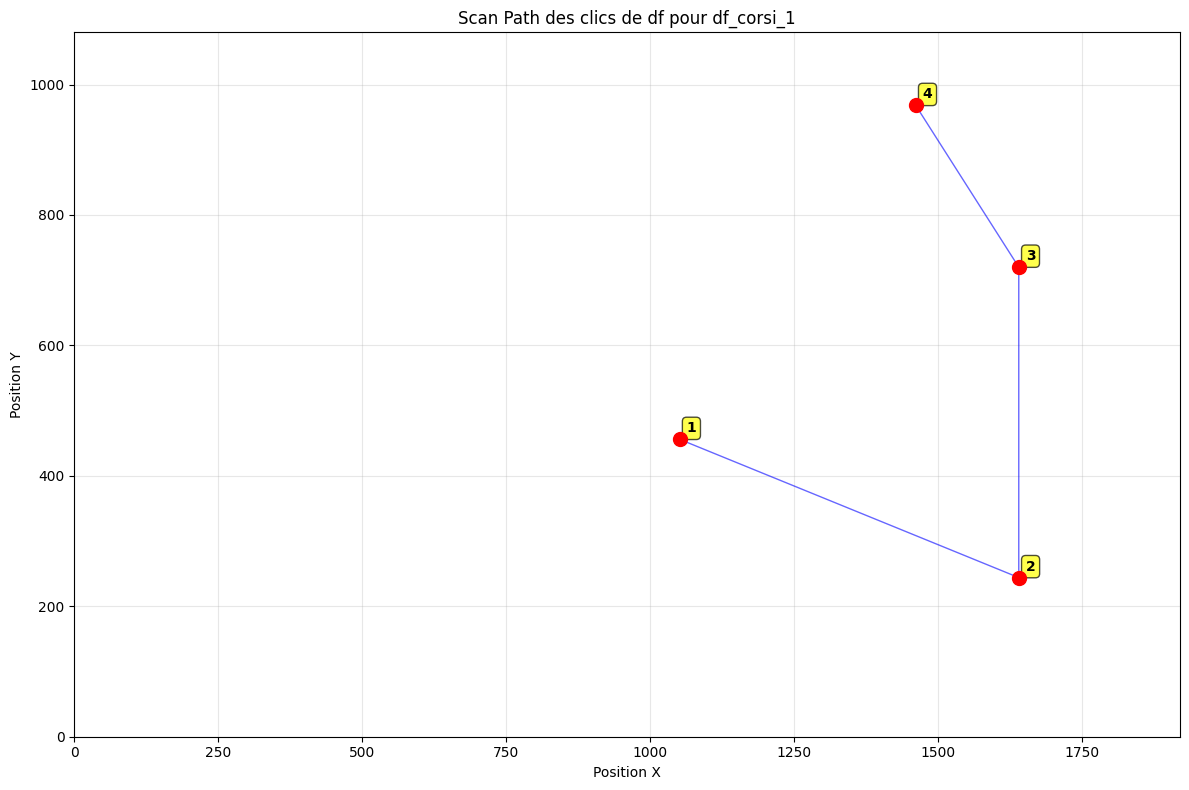

Nombre total de clics gauche: 4
Ordre chronologique des clics:


KeyError: 'elapsed_formatted'

In [70]:
df_corsi_debut = couper_df_par_duree(df_corsi, minutes=1, secondes=37.099, couper_debut=True)
df_corsi_fin = couper_df_par_duree(df_corsi, minutes=1, secondes=40.640, couper_debut=True)

df_corsi_1 = pd.concat([df_corsi_debut, df_corsi_fin]).drop_duplicates(subset=['timestamp', 'key', 'event_type'], keep=False)

scanpath(df_corsi_1, "df_corsi_1")

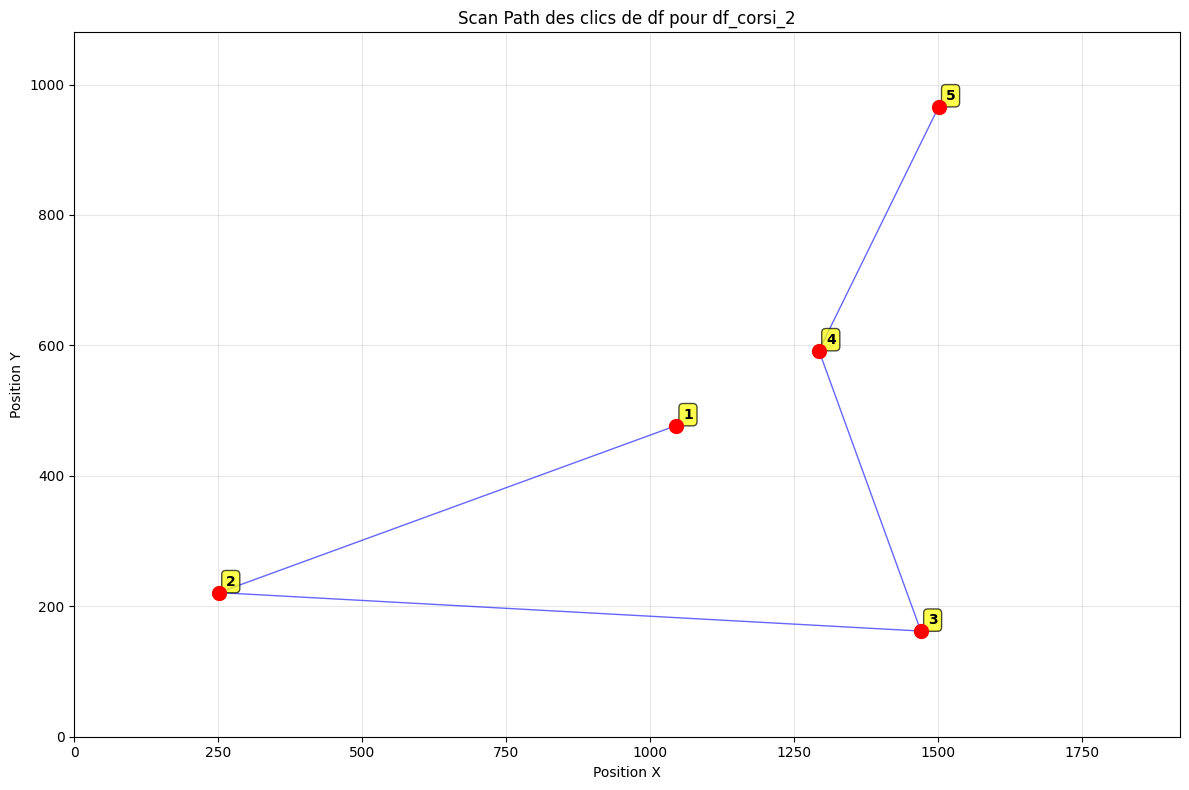

Nombre total de clics gauche: 5
Ordre chronologique des clics:
  Clic 1: (1045, 477) à 2025-07-02 14:34:57.624984
  Clic 2: (251, 221) à 2025-07-02 14:34:58.224777
  Clic 3: (1470, 162) à 2025-07-02 14:34:58.858051
  Clic 4: (1293, 592) à 2025-07-02 14:34:59.368842
  Clic 5: (1501, 966) à 2025-07-02 14:35:00.369722


In [59]:
df_corsi_debut = couper_df_par_duree(df_corsi, minutes=1, secondes=44.605, couper_debut=True)
df_corsi_fin = couper_df_par_duree(df_corsi, minutes=1, secondes=48.702, couper_debut=True)
df_corsi_2 = pd.concat([df_corsi_debut, df_corsi_fin]).drop_duplicates(subset=['timestamp', 'key', 'event_type'], keep=False)
scanpath(df_corsi_2, "df_corsi_2")

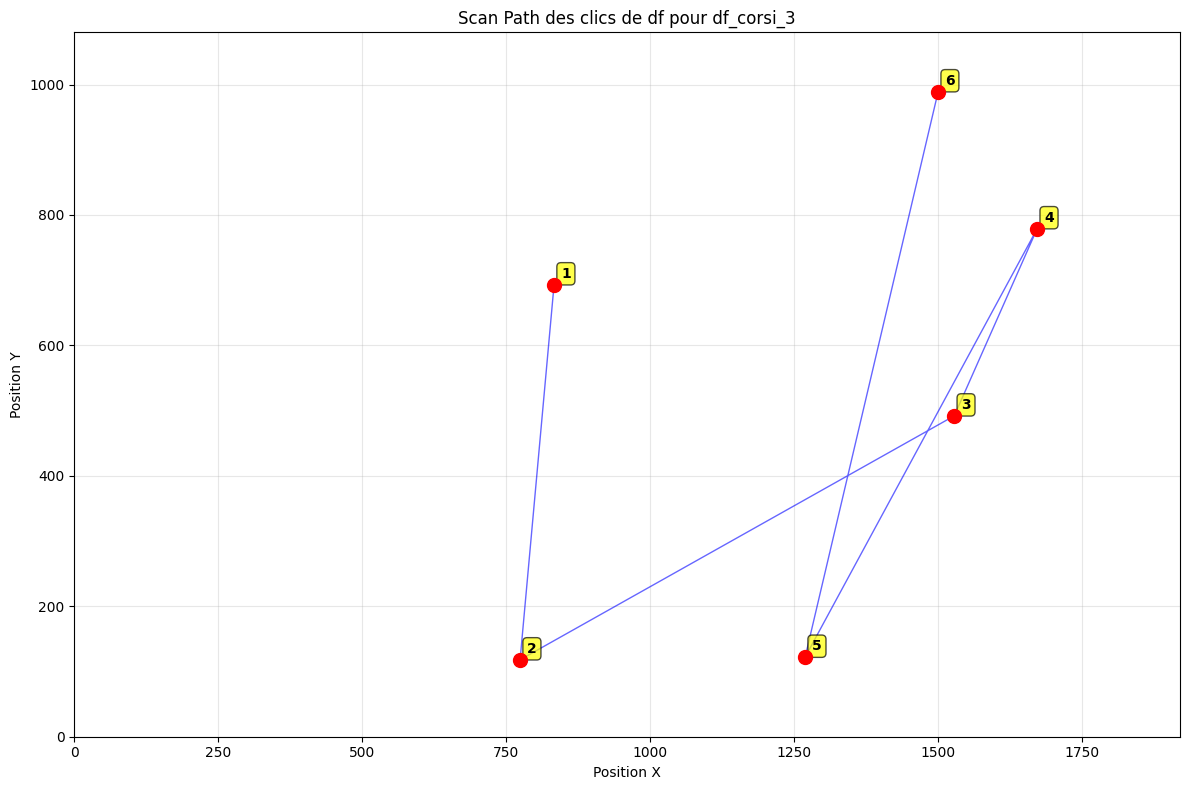

Nombre total de clics gauche: 6
Ordre chronologique des clics:
  Clic 1: (833, 693) à 2025-07-02 14:35:06.850517
  Clic 2: (774, 118) à 2025-07-02 14:35:07.466030
  Clic 3: (1528, 492) à 2025-07-02 14:35:08.101383
  Clic 4: (1672, 779) à 2025-07-02 14:35:08.594002
  Clic 5: (1269, 122) à 2025-07-02 14:35:09.248605
  Clic 6: (1500, 989) à 2025-07-02 14:35:09.993345


In [60]:
df_corsi_debut = couper_df_par_duree(df_corsi, minutes=1, secondes=53.107, couper_debut=True)
df_corsi_fin = couper_df_par_duree(df_corsi, minutes=1, secondes=58.903, couper_debut=True)
df_corsi_3 = pd.concat([df_corsi_debut, df_corsi_fin]).drop_duplicates(subset=['timestamp', 'key', 'event_type'], keep=False)
scanpath(df_corsi_3,    "df_corsi_3")

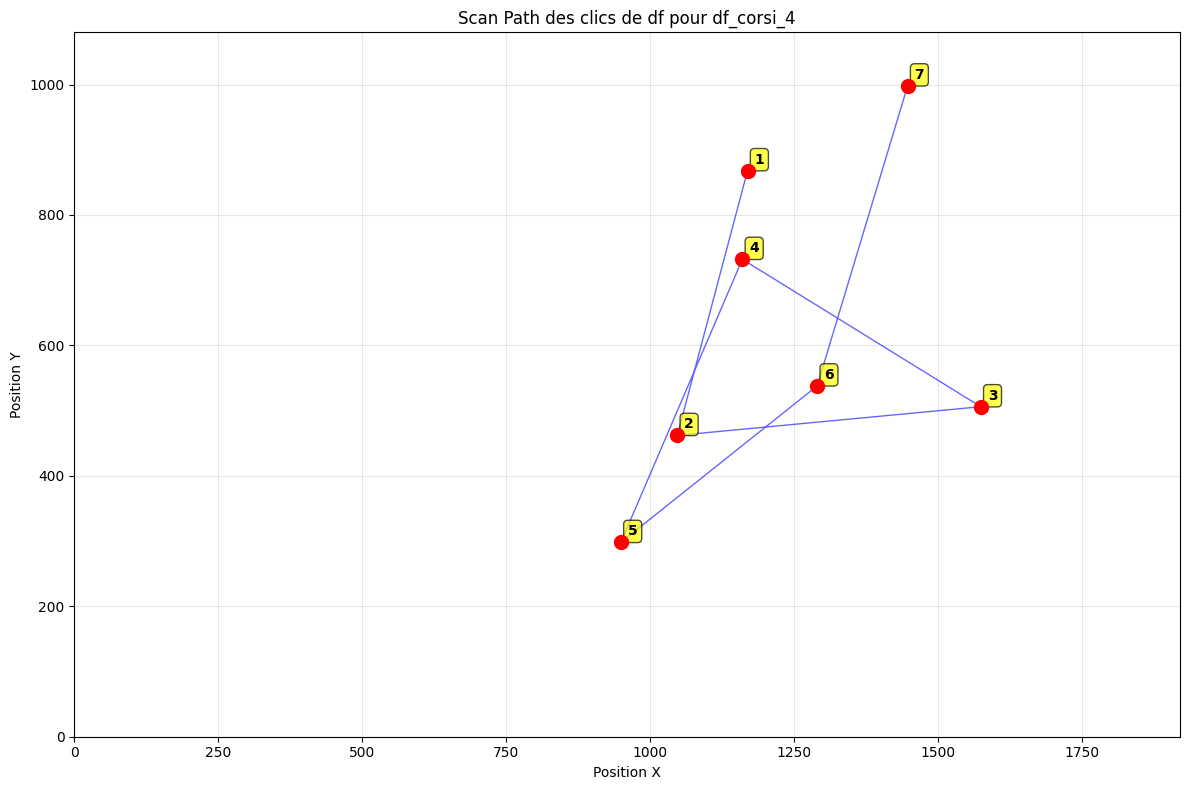

Nombre total de clics gauche: 7
Ordre chronologique des clics:
  Clic 1: (1169, 868) à 2025-07-02 14:35:17.049729
  Clic 2: (1047, 462) à 2025-07-02 14:35:17.610505
  Clic 3: (1574, 506) à 2025-07-02 14:35:18.090922
  Clic 4: (1160, 732) à 2025-07-02 14:35:23.150753
  Clic 5: (949, 298) à 2025-07-02 14:35:23.652246
  Clic 6: (1290, 538) à 2025-07-02 14:35:24.174351
  Clic 7: (1447, 998) à 2025-07-02 14:35:24.791244


In [61]:
df_corsi_debut = couper_df_par_duree(df_corsi, minutes=2, secondes=2.718, couper_debut=True)
df_corsi_fin = couper_df_par_duree(df_corsi, minutes=2, secondes=13.541, couper_debut=True)
df_corsi_4 = pd.concat([df_corsi_debut, df_corsi_fin]).drop_duplicates(subset=['timestamp', 'key', 'event_type'], keep=False)
scanpath(df_corsi_4, "df_corsi_4")    

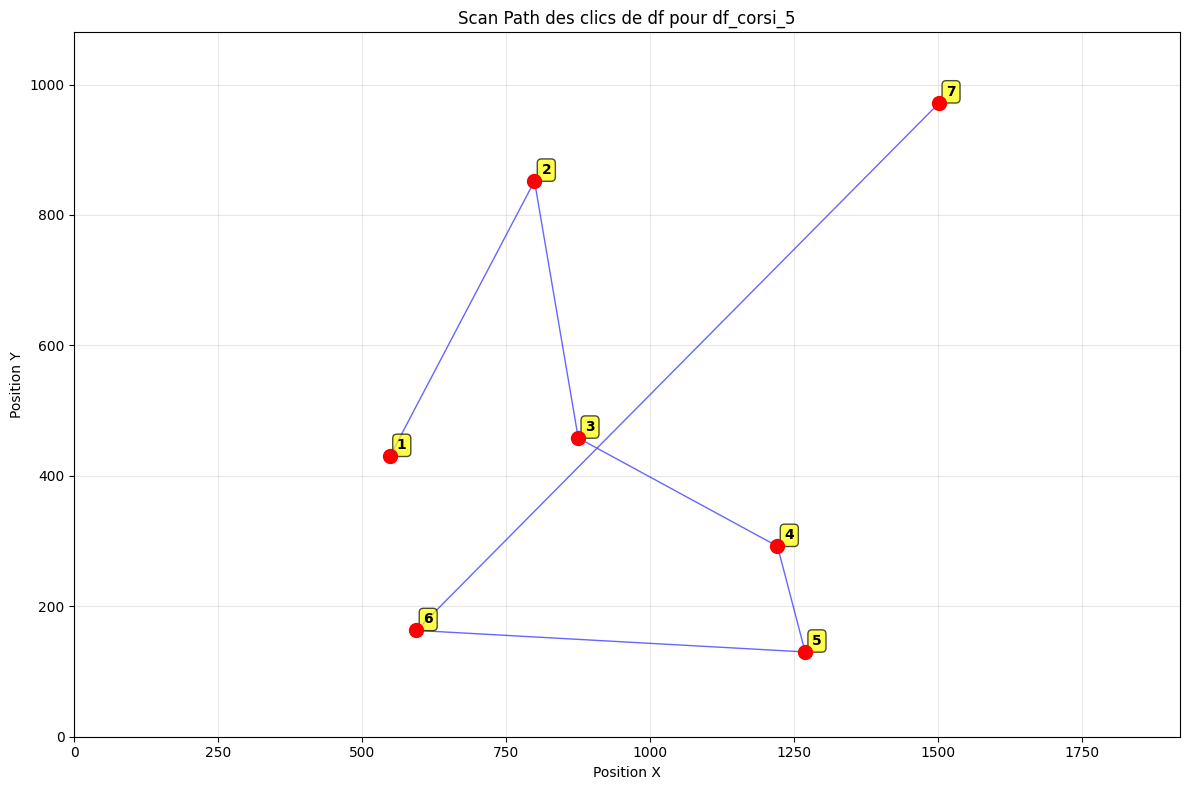

Nombre total de clics gauche: 7
Ordre chronologique des clics:
  Clic 1: (548, 430) à 2025-07-02 14:35:31.799260
  Clic 2: (799, 852) à 2025-07-02 14:35:32.359761
  Clic 3: (875, 458) à 2025-07-02 14:35:32.828626
  Clic 4: (1221, 292) à 2025-07-02 14:35:33.303531
  Clic 5: (1269, 130) à 2025-07-02 14:35:33.735506
  Clic 6: (594, 163) à 2025-07-02 14:35:34.314820
  Clic 7: (1502, 972) à 2025-07-02 14:35:37.174855


In [62]:
df_corsi_debut = couper_df_par_duree(df_corsi, minutes=2, secondes=17.676, couper_debut=True)
df_corsi_fin = couper_df_par_duree(df_corsi, minutes=2, secondes=26.740, couper_debut=True)
df_corsi_5 = pd.concat([df_corsi_debut, df_corsi_fin]).drop_duplicates(subset=['timestamp', 'key', 'event_type'], keep=False)
scanpath(df_corsi_5, "df_corsi_5")

## Les 5 dernieres intervalles

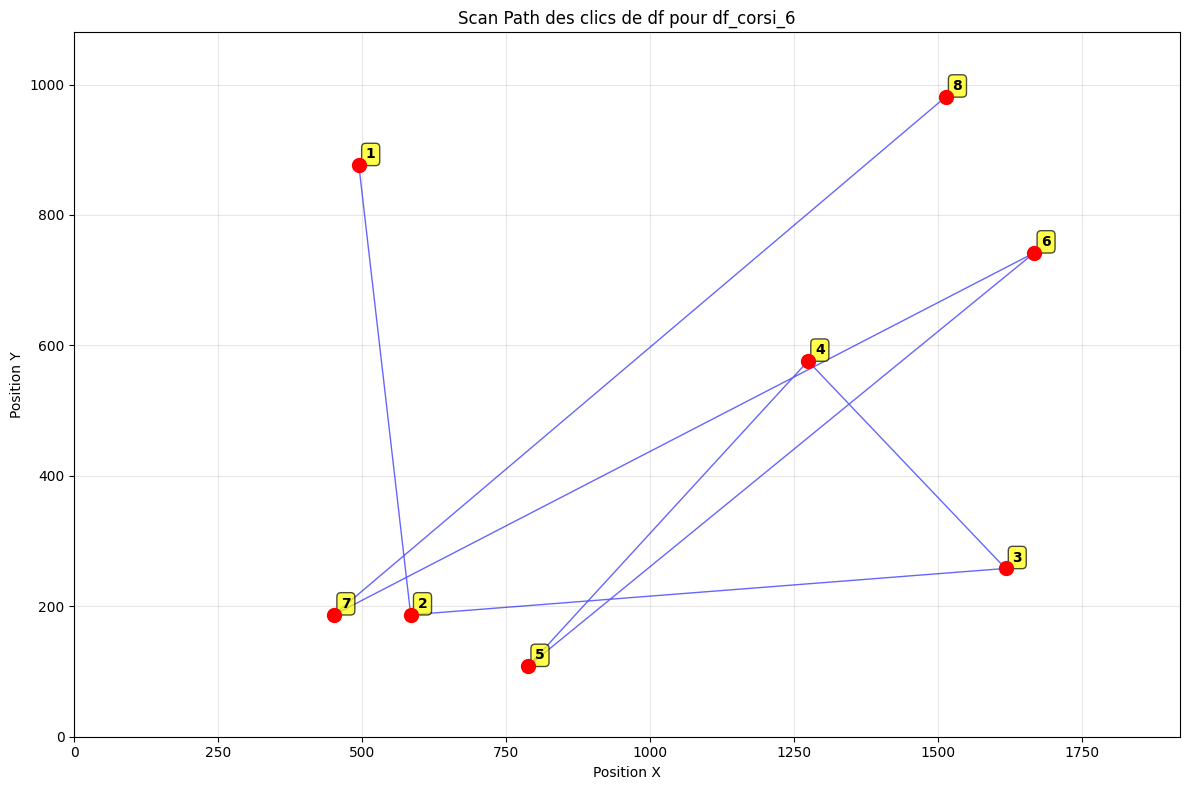

Nombre total de clics gauche: 8
Ordre chronologique des clics:
  Clic 1: (494, 876) à 2025-07-02 14:35:44.974456
  Clic 2: (584, 187) à 2025-07-02 14:35:45.590092
  Clic 3: (1617, 258) à 2025-07-02 14:35:46.423983
  Clic 4: (1274, 576) à 2025-07-02 14:35:46.916194
  Clic 5: (788, 108) à 2025-07-02 14:35:47.473277
  Clic 6: (1667, 742) à 2025-07-02 14:35:48.010078
  Clic 7: (451, 187) à 2025-07-02 14:35:48.567711
  Clic 8: (1513, 981) à 2025-07-02 14:35:49.224076


In [63]:
df_corsi_debut = couper_df_par_duree(df_corsi, minutes=2, secondes=29.605, couper_debut=True)
df_corsi_fin = couper_df_par_duree(df_corsi, minutes=2, secondes=37.927, couper_debut=True)
df_corsi_6 = pd.concat([df_corsi_debut, df_corsi_fin]).drop_duplicates(subset=['timestamp', 'key', 'event_type'], keep=False)
scanpath(df_corsi_6,   "df_corsi_6")


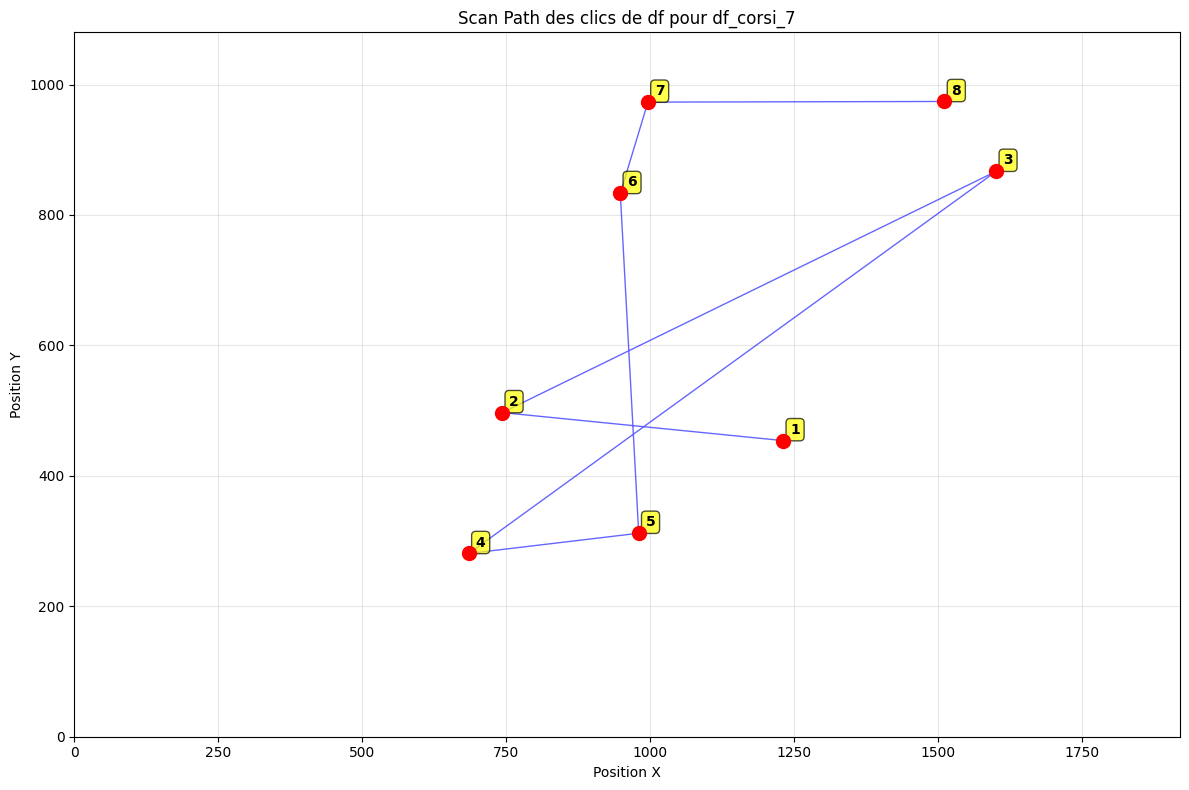

Nombre total de clics gauche: 8
Ordre chronologique des clics:
  Clic 1: (1231, 454) à 2025-07-02 14:35:56.840601
  Clic 2: (743, 497) à 2025-07-02 14:35:57.414809
  Clic 3: (1601, 867) à 2025-07-02 14:35:57.978499
  Clic 4: (685, 281) à 2025-07-02 14:35:58.581007
  Clic 5: (980, 312) à 2025-07-02 14:35:59.072513
  Clic 6: (948, 833) à 2025-07-02 14:35:59.751037
  Clic 7: (996, 973) à 2025-07-02 14:36:00.290615
  Clic 8: (1511, 974) à 2025-07-02 14:36:00.840861


In [64]:
df_corsi_debut = couper_df_par_duree(df_corsi, minutes=2, secondes=41.798, couper_debut=True)
df_corsi_fin = couper_df_par_duree(df_corsi, minutes=2, secondes=49.346, couper_debut=True)
df_corsi_7 = pd.concat([df_corsi_debut, df_corsi_fin]).drop_duplicates(subset=['timestamp', 'key', 'event_type'], keep=False)
scanpath(df_corsi_7, "df_corsi_7")


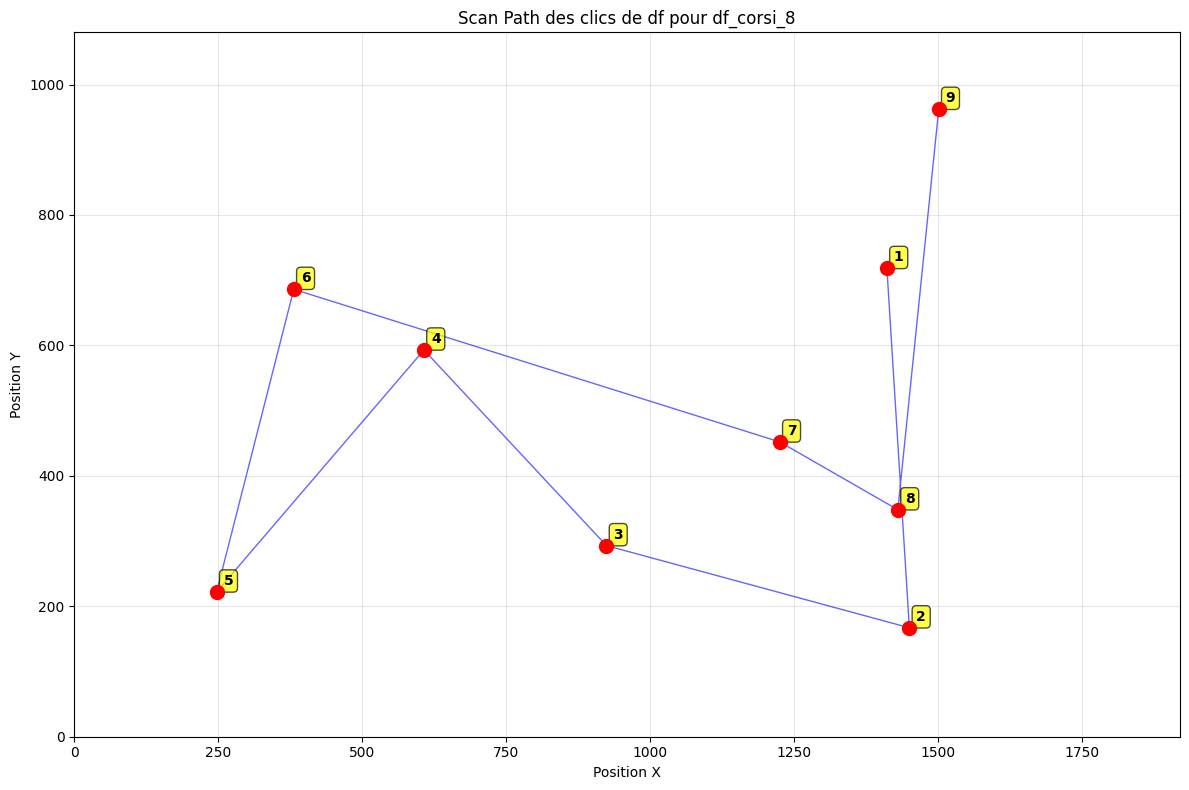

Nombre total de clics gauche: 9
Ordre chronologique des clics:
  Clic 1: (1411, 718) à 2025-07-02 14:36:08.749125
  Clic 2: (1450, 167) à 2025-07-02 14:36:09.423274
  Clic 3: (924, 293) à 2025-07-02 14:36:10.441204
  Clic 4: (607, 593) à 2025-07-02 14:36:13.068037
  Clic 5: (247, 222) à 2025-07-02 14:36:13.688157
  Clic 6: (381, 686) à 2025-07-02 14:36:14.168968
  Clic 7: (1225, 452) à 2025-07-02 14:36:14.716368
  Clic 8: (1430, 348) à 2025-07-02 14:36:15.176501
  Clic 9: (1501, 962) à 2025-07-02 14:36:15.889166


In [65]:
df_corsi_debut = couper_df_par_duree(df_corsi, minutes=2, secondes=53.556, couper_debut=True)
df_corsi_fin = couper_df_par_duree(df_corsi, minutes=3, secondes=4.442, couper_debut=True)
df_corsi_8 = pd.concat([df_corsi_debut, df_corsi_fin]).drop_duplicates(subset=['timestamp', 'key', 'event_type'], keep=False)
scanpath(df_corsi_8, "df_corsi_8")


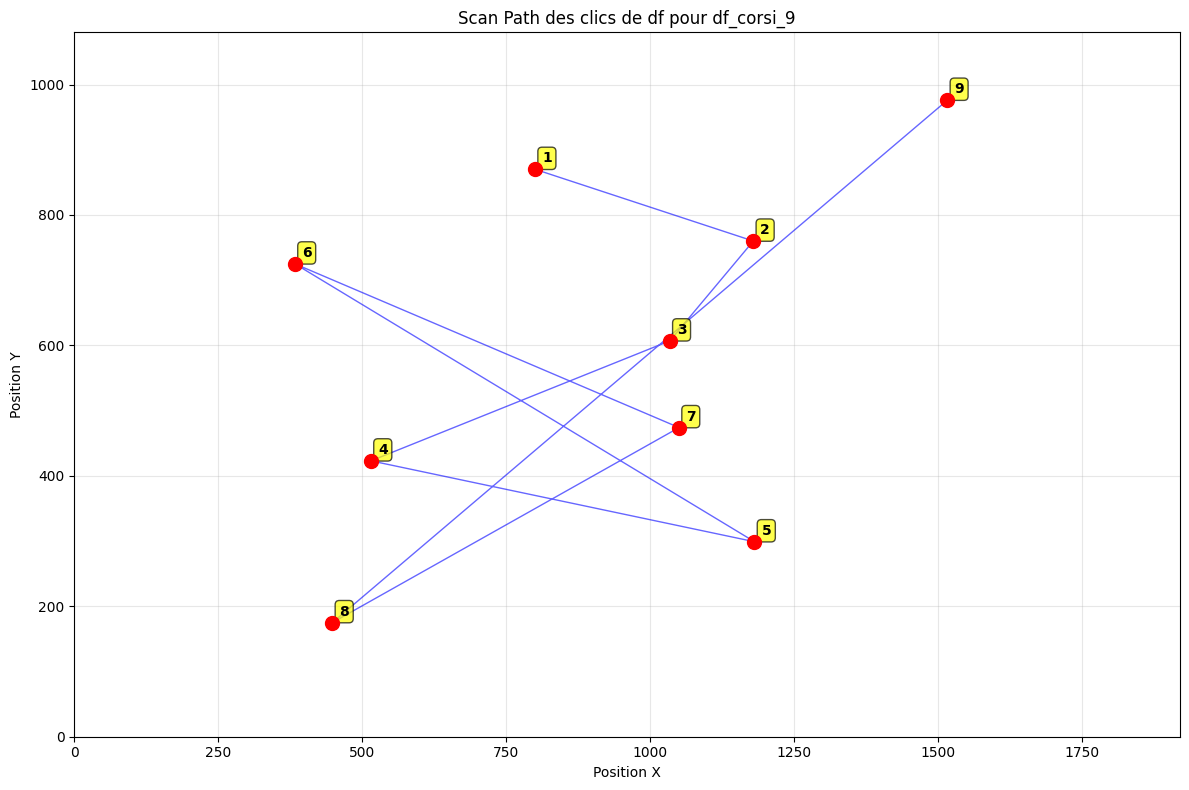

Nombre total de clics gauche: 9
Ordre chronologique des clics:
  Clic 1: (800, 870) à 2025-07-02 14:36:24.043344
  Clic 2: (1179, 760) à 2025-07-02 14:36:24.620325
  Clic 3: (1034, 607) à 2025-07-02 14:36:25.784973
  Clic 4: (515, 423) à 2025-07-02 14:36:26.310018
  Clic 5: (1181, 299) à 2025-07-02 14:36:26.840461
  Clic 6: (383, 725) à 2025-07-02 14:36:27.376722
  Clic 7: (1050, 474) à 2025-07-02 14:36:27.892611
  Clic 8: (448, 175) à 2025-07-02 14:36:28.407371
  Clic 9: (1516, 976) à 2025-07-02 14:36:28.974233


In [66]:
df_corsi_debut = couper_df_par_duree(df_corsi, minutes=3, secondes=8.312, couper_debut=True)
df_corsi_fin = couper_df_par_duree(df_corsi, minutes=3, secondes=17.700, couper_debut=True)
df_corsi_9 = pd.concat([df_corsi_debut, df_corsi_fin]).drop_duplicates(subset=['timestamp', 'key', 'event_type'], keep=False)
scanpath(df_corsi_9,    "df_corsi_9")


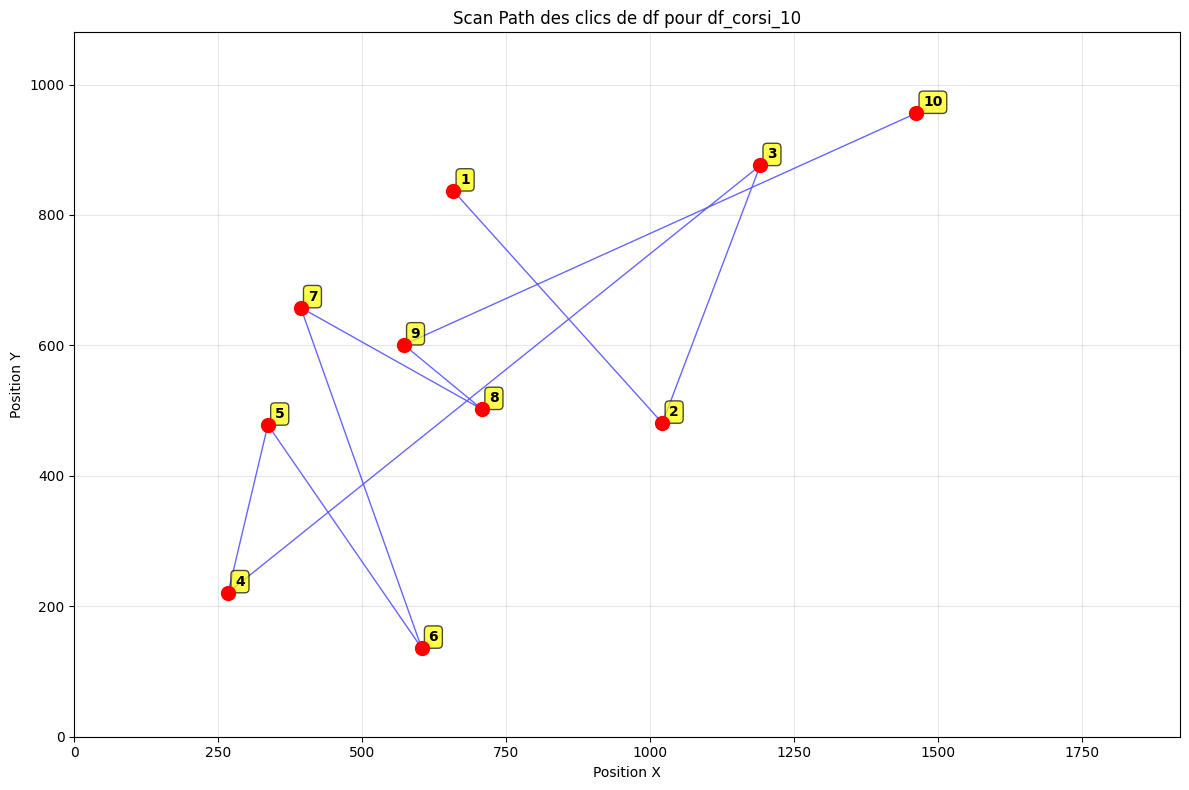

Nombre total de clics gauche: 10
Ordre chronologique des clics:
  Clic 1: (658, 837) à 2025-07-02 14:36:37.363552
  Clic 2: (1021, 481) à 2025-07-02 14:36:37.875079
  Clic 3: (1191, 876) à 2025-07-02 14:36:38.313075
  Clic 4: (267, 221) à 2025-07-02 14:36:38.874360
  Clic 5: (336, 478) à 2025-07-02 14:36:39.252489
  Clic 6: (603, 136) à 2025-07-02 14:36:39.682929
  Clic 7: (393, 658) à 2025-07-02 14:36:40.198623
  Clic 8: (708, 502) à 2025-07-02 14:36:40.578926
  Clic 9: (572, 601) à 2025-07-02 14:36:40.888070
  Clic 10: (1462, 956) à 2025-07-02 14:36:41.592886


In [67]:
df_corsi_debut = couper_df_par_duree(df_corsi, minutes=3, secondes=21.273, couper_debut=True)
df_corsi_fin = couper_df_par_duree(df_corsi, minutes=3, secondes=30.182, couper_debut=True)
df_corsi_10 = pd.concat([df_corsi_debut, df_corsi_fin]).drop_duplicates(subset=['timestamp', 'key', 'event_type'], keep=False)
scanpath(df_corsi_10, "df_corsi_10")


### Analyse spatiale de test de CS2 à different intervalle de temps :



### Partie 4.2: Analyse temporelle

Dans cette partie, il sera primodiale de faire un analyse temporelle pour voir si temporellement nous suivons le regard lorsque nous faisons une action avec le souris


In [39]:
def duree_activite_df(df):
    if df.empty or 'timestamp' not in df.columns:
        return "DataFrame vide ou colonne 'timestamp' manquante."

    if not pd.api.types.is_datetime64_any_dtype(df['timestamp']):
        df['timestamp'] = pd.to_datetime(df['timestamp'])

    debut = df['timestamp'].iloc[0]
    fin = df['timestamp'].iloc[-1]
    duree = fin - debut
    total_seconds = int(duree.total_seconds())
    minutes = total_seconds // 60
    secondes = total_seconds % 60

    return {
        "début": debut.strftime("%Hh%M"),
        "fin": fin.strftime("%Hh%M"),
        "durée": f"{minutes} min {secondes} s"
    }



duree_cs2 = duree_activite_df(df_cs2)
duree_flan = duree_activite_df(df_flan) 
duree_corsi = duree_activite_df(df_corsi)
duree_switch = duree_activite_df(df_switch)

print("\nDurée d'activité pour le jeu de données CS2 : ", duree_cs2)
print("\nDurée d'activité pour le jeu de données Flan : ", duree_flan)
print("\nDurée d'activité pour le jeu de données Corsi : ", duree_corsi)
print("\nDurée d'activité pour le jeu de données Switching : ", duree_switch)      


Durée d'activité pour le jeu de données CS2 :  {'début': '13h26', 'fin': '13h50', 'durée': '24 min 4 s'}

Durée d'activité pour le jeu de données Flan :  {'début': '14h39', 'fin': '14h50', 'durée': '10 min 43 s'}

Durée d'activité pour le jeu de données Corsi :  {'début': '14h33', 'fin': '14h37', 'durée': '4 min 17 s'}

Durée d'activité pour le jeu de données Switching :  {'début': '14h51', 'fin': '14h58', 'durée': '7 min 40 s'}


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


move_data = df[df["action"] == "move"].copy()

# Compute time differences
move_data["time_diff_sec"] = move_data["timestamp"].diff().dt.total_seconds()

# Compute distances between points
move_data["dx"] = move_data["position"].apply(lambda p: p[0]).diff()
move_data["dy"] = move_data["position"].apply(lambda p: p[1]).diff()
move_data["distance"] = (move_data["dx"]**2 + move_data["dy"]**2)**0.5

# Compute speed (pixels/second)
move_data["speed"] = move_data["distance"] / move_data["time_diff_sec"]

# Plot speed over time
plt.figure(figsize=(12, 6))
plt.plot(move_data["timestamp"], move_data["speed"], label="Cursor Speed (px/s)")
plt.xlabel("Time")
plt.ylabel("Speed (pixels/second)")
plt.title("Temporal Analysis of Cursor Movement Speed")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------------------------------------- -- 7.6/8.1 MB 38.5 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 35.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 31.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------------------------- 7.0/7.0 MB 38.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
